In [1]:
# Importamos librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier


C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# cargamos los datos
input_files = 'Datos_arboles.txt'
datos = np.loadtxt(input_files,delimiter = ',')
X,y = datos[:,:-1], datos[:,-1]

In [6]:
# Separamos los datos de acuerdo a las etiquetas(2 clases
clase0 = np.array(X[y==0])
clase1 = np.array(X[y==1])

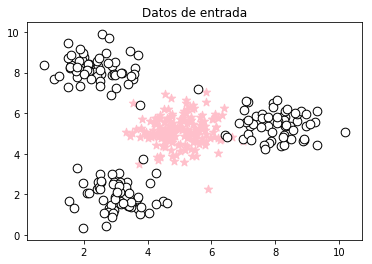

In [10]:
# Visualizar los datos
plt.figure()
plt.scatter(clase0[:,0],clase0[:,1], s = 75, facecolors = 'pink', edgecolors = 'pink', linewidth = 1, marker = '*')
plt.scatter(clase1[:,0],clase1[:,1], s = 75, facecolors = 'white', edgecolors = 'black', linewidth = 1, marker = 'o')
plt.title('Datos de entrada')
plt.show()

In [15]:
# Dividimos los datos en entrenamiento y validación
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.25, random_state = 5)


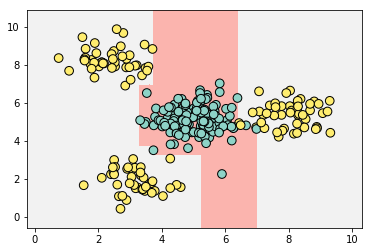

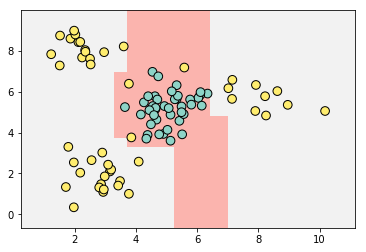

In [20]:
# construimos el clasificador
# variable tipo diccionario con los parametros del arbol
# random state: semilla con la que arranca las cosas aleatorias
# max_depth: Numero de niveles del arbolito.
parametros = {'random_state' : 0, 'max_depth':4}
#construir arbol de clasificación
clasificador = DecisionTreeClassifier(**parametros)

# lo entrenamos para que con el conjunto de entrenamiento se arme el arbolito
clasificador.fit(X_train, y_train)

#lo vamos a visualizar para cada conjunto de datos. 
# caso 1: Conjunto de entrenamiento
vizualizar_clasificador(clasificador,X_train,y_train)

# caso 2: Conjunto de pruebas
y_test_pred = clasificador.predict(X_test)
vizualizar_clasificador(clasificador,X_test,y_test)

In [23]:
# Evaluamos el desempeño del clasificador imprimiendo el reporte de clasificación.
nombres_clases = ['Clase 0','Clase 1']
print('\n' + '#'*40)
print('\n Desempeño del clasificador sobre el conjunto de entrenamiento \n')
print(classification_report(y_train, clasificador.predict(X_train), target_names = nombres_clases))
print('#'*70 + '\n')
print('\n'+ '#'*70 )
print('Desempeño del clasificador sobre el conjunto de la validación \n')
print(classification_report(y_test,y_test_pred, target_names = nombres_clases))
print('\n'+ '#'*70 )


########################################

 Desempeño del clasificador sobre el conjunto de entrenamiento 

             precision    recall  f1-score   support

    Clase 0       0.99      1.00      1.00       137
    Clase 1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

######################################################################


######################################################################
Desempeño del clasificador sobre el conjunto de la validación 

             precision    recall  f1-score   support

    Clase 0       0.93      1.00      0.97        43
    Clase 1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90


######################################################################


In [17]:
# para graficar las muestras
def vizualizar_clasificador(clasificador,X,y):
    #definimos valores maximos y minimos de la malla que vamos a graficar
    min_x,max_x = X[:,0].min()-1.0, X[:,0].max()+1.0
    min_y,max_y = X[:,1].min()-1.0, X[:,1].max()+1.0
    
    #definir el paso de la malla
    paso = 0.01
    
    #definimos la malla
    x_vals,y_vals =np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    
    #np.c: para concatenar los valores
    #np.ravel: coloca todos los datos de varios arreglos o varias dimensiones en 1 sola
    
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    # reordenamos la salida para que nos quede en forma de malla
    resultados = resultados.reshape(x_vals.shape)
    
    #creamos la figura 
    plt.figure()
    # Elegimos la paleta de colores(colormap)
    plt.pcolormesh(x_vals,y_vals, resultados, cmap=plt.cm.Pastel1)
    
    #Ubicamos los puntos a clasificar
    # X[:,0] es la coordenada en el eje x
    # X[:,1] es la coordenada y
    # c(color) define el color (c=etiquetas)
    # s = es el tamaño de la letra(size)
    # edgcolors = define el borde
    # linewidth = define el ancho de las lineas
    # cmap = define el mapa de color
    plt.scatter(X[:,0],X[:,1],c=y,s=75, edgecolors='black',linewidth=1,cmap=plt.cm.Set3)
    
    #fijamos los limites para los ejes x e y
    plt.xlim(x_vals.min(),x_vals.max())
    plt.ylim(y_vals.min(),y_vals.max())
    
    #Mostramos la grafica
    plt.show()